In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.svm import SVC

In [9]:
digits = load_digits()

X, y = digits.data, digits.target 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
model = LinearSVC()
model.fit(X_train, y_train) #1 vs rest
accuracy_score(y_test, model.predict(X_test))

/home/mikolaj/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9638888888888889

In [13]:
model = Pipeline([("scaler", StandardScaler()),
                  ("model", LinearSVC())]) #nazywamy nasze kroki
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

/home/mikolaj/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9527777777777777

In [15]:
scaler = StandardScaler()
scaler.fit_transform(X_train).max(0).round(0)

array([ 0.,  8.,  2.,  1.,  1.,  2.,  4., 13., 20.,  4.,  1.,  1.,  1.,
        1.,  4., 14., 22.,  4.,  1.,  2.,  1.,  1.,  4., 19., 38.,  4.,
        1.,  1.,  1.,  1.,  3., 19.,  0.,  3.,  1.,  1.,  1.,  1.,  3.,
        0., 25.,  5.,  1.,  1.,  1.,  1.,  3., 22., 35.,  9.,  1.,  1.,
        1.,  1.,  2., 13., 38.,  9.,  2.,  1.,  1.,  2.,  3.,  8.])

In [17]:
from sklearn.preprocessing import MaxAbsScaler

In [18]:
model = Pipeline([("scaler", MaxAbsScaler()),
                  ("model", LinearSVC())]) #nazywamy nasze kroki
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.9638888888888889

In [20]:
model = Pipeline([("scaler", MaxAbsScaler()),
                  ("model", SVC())]) #nazywamy nasze kroki
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.9916666666666667

In [22]:
from sklearn.ensemble import BaggingClassifier
?BaggingClassifier

Init signature:
BaggingClassifier(
    base_estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)
Docstring:     
A Bagging classifier.

A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random
subsets of the dataset are drawn as random subsets of the samples, then
this algorithm is known as Pasting [1]_. If samples are drawn with
repl

In [25]:
from sklearn.ensemble import RandomForestClassifier
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [27]:
model = Pipeline([("scaler", MaxAbsScaler()),
                  ("model", BaggingClassifier())])
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.9416666666666667

In [37]:
round((X_train.shape[0]/2))

718

In [40]:
model = Pipeline([("scaler", MaxAbsScaler()),
                  ("model", BaggingClassifier(n_estimators=round((X_train.shape[0]/2))))])
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.9694444444444444

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(DecisionTreeClassifier(), 100, #100- liczba drzew losowych 
                          max_samples = 0.5, 
                          max_features = 0.5)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.975

In [43]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8555555555555555

In [46]:
accuracies = []
N_estimators = [3, 5, 10, 25, 50, 100, 200, 300, 500, 1000]

for n_trees in N_estimators:
    model = BaggingClassifier(DecisionTreeClassifier(), n_trees, #100- liczba drzew losowych 
                              max_samples = 0.5, 
                              max_features = 0.5)
    model.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, model.predict(X_test)))

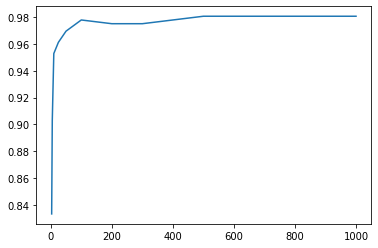

In [48]:
import matplotlib.pyplot as plt

plt.plot(N_estimators, accuracies)
plt.show()

In [49]:
# Wnioski:

# nie ma sensu budować komitetu dla małej liczby drzew. W praktyce od 100 zaczynamy
# nie ma sensu w nieskońćzoność ładować tych drzew

In [50]:
import pandas as pd
data = pd.read_csv("Dane/titanic.csv", decimal=",")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,NaN
1,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,"East Providence, RI"
2,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,"East Providence, RI"
3,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,"East Providence, RI"
4,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.65,NaN,S,"Norway Los Angeles, CA"
